# Channels and Colors

In [2]:
import matplotlib.pyplot as plt 
import imageio
import numpy as np

In [4]:
neuron_img = imageio.volread('Neuron-composite.tif')

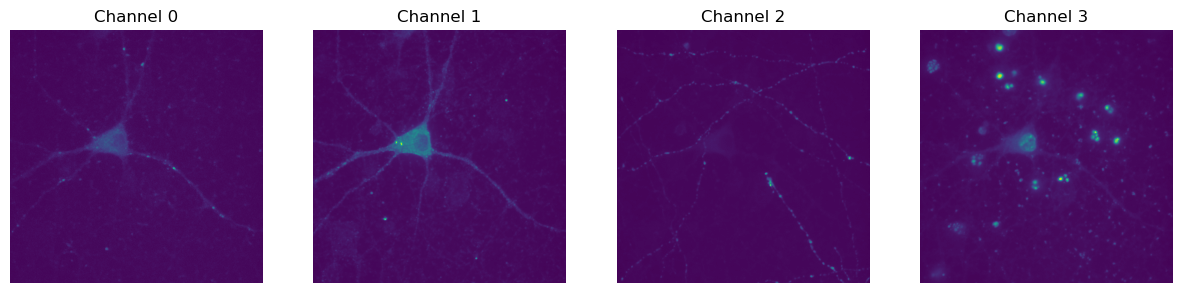

In [8]:
plt.figure(figsize=(15, 6))

for i in range(neuron_img.shape[0]):
    
    plt.subplot(1, neuron_img.shape[0], i+1)
    
    im_channel = neuron_img[i]
    plt.imshow(im_channel)
    plt.title(f'Channel {i}')
    plt.axis(False)

plt.show()

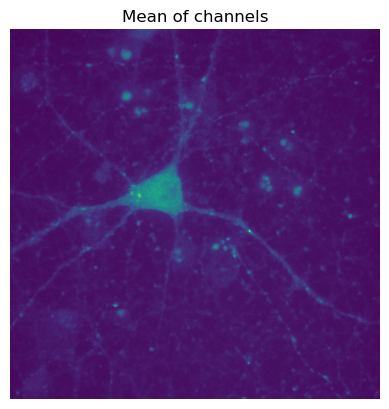

In [10]:
plt.imshow(neuron_img.mean(axis=0))
plt.title('Mean of channels')
plt.axis(False)
plt.show()

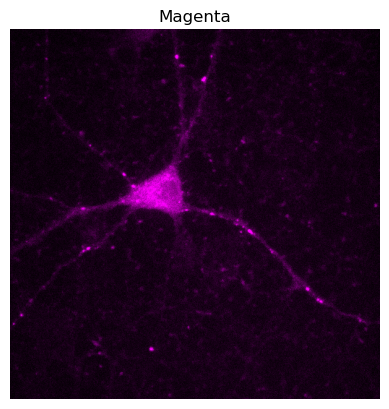

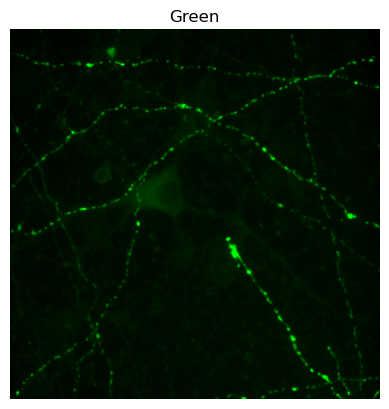

In [12]:
def colorize(im, color, clip_percentile=0.1):

    if im.ndim > 2 and im.shape[0] != 1:
        raise ValueError('This function expects a single-channel image!')
        
    im_scaled = im.astype(np.float32) - np.percentile(im, clip_percentile)
    im_scaled = im_scaled / np.percentile(im_scaled, 100 - clip_percentile)
    im_scaled = np.clip(im_scaled, 0, 1)
    
    im_scaled = np.atleast_3d(im_scaled)
    
    color = np.asarray(color).reshape((1, 1, -1))
    return im_scaled * color
    
# The color we provide gives RGB values in order, between 0 and 1
im_red = colorize(neuron_img[0], (1, 0, 1))
plt.imshow(im_red)
plt.axis(False)
plt.title('Magenta')
plt.show()

im_green = colorize(neuron_img[2], (0, 1, 0))
plt.imshow(im_green)
plt.axis(False)
plt.title('Green')
plt.show()

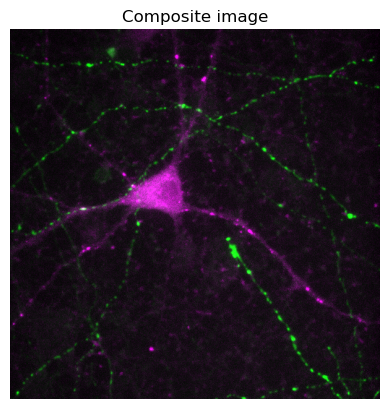

In [18]:
im_composite = np.clip(im_red + im_green, 0, 1)
plt.imshow(im_composite)
plt.title('Composite image')
plt.axis(False)
plt.show()